In [1]:
import pandas as pd
root = r'C:\Users\janse\OneDrive\Bureaublad\Master\Data Mining Techniques'
dataset = root + r'\dataset_mood_smartphone.csv'

In [2]:
df_main = pd.read_csv(dataset)
print(df_main.info())
variables = df_main.variable.unique()
print(variables)
df_main.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376912 entries, 0 to 376911
Data columns (total 5 columns):
Unnamed: 0    376912 non-null int64
id            376912 non-null object
time          376912 non-null object
variable      376912 non-null object
value         376710 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.4+ MB
None
['mood' 'circumplex.arousal' 'circumplex.valence' 'activity' 'screen'
 'call' 'sms' 'appCat.builtin' 'appCat.communication'
 'appCat.entertainment' 'appCat.finance' 'appCat.game' 'appCat.office'
 'appCat.other' 'appCat.social' 'appCat.travel' 'appCat.unknown'
 'appCat.utilities' 'appCat.weather']


,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


In [29]:
df = df_main
df['time'] = pd.to_datetime(df['time'])
df = pd.pivot_table(df, index=['id','time'], columns='variable', values='value').reset_index()
df['date'] = df['time'].apply(lambda x: x.date())
features = {'time':'count',
            'mood':'mean',
            'circumplex.valence':'mean',
            'circumplex.arousal' : 'mean',
            'activity':'mean',
            'screen':'sum',
            'call':'sum',
            'sms':'sum',
            'appCat.builtin': 'sum',
            'appCat.communication': 'sum',
            'appCat.entertainment': 'sum',
            'appCat.finance': 'sum',
            'appCat.game': 'sum',
            'appCat.office': 'sum',
            'appCat.other': 'sum',
            'appCat.social': 'sum',
            'appCat.travel': 'sum',
            'appCat.unknown': 'sum',
            'appCat.utilities': 'sum',
            'appCat.weather': 'sum'
           }
df = df.groupby(['id', 'date']).agg(features).reset_index()
df = df[~df.mood.isnull()]
print(df.shape)
df.head(100)


(1268, 22)


,id,date,time,mood,circumplex.valence,circumplex.arousal,activity,screen,call,sms,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
7,AS14.01,2014-02-26,7,6.250000,0.750000,-0.250000,NaN,0.000000,1.0,2.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,AS14.01,2014-02-27,3,6.333333,0.333333,0.000000,NaN,0.000000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
26,AS14.01,2014-03-21,616,6.200000,0.200000,0.200000,0.134050,17978.907000,6.0,0.0,...,1007.456,49.544,0.000,172.206,239.751,4508.500,915.445,0.000,598.754,0.000
27,AS14.01,2014-03-22,367,6.400000,0.500000,0.600000,0.236880,6142.161000,3.0,1.0,...,93.324,21.076,0.000,0.000,98.143,439.632,37.305,0.000,117.621,0.000
28,AS14.01,2014-03-23,353,6.800000,0.800000,0.200000,0.142741,6773.832001,0.0,0.0,...,94.346,43.403,0.000,0.000,72.823,900.839,0.000,0.000,30.086,30.386
29,AS14.01,2014-03-24,670,6.000000,0.000000,0.800000,0.078961,15047.351001,10.0,0.0,...,976.971,34.106,0.000,3.010,66.558,3223.626,419.805,0.000,178.732,0.000
30,AS14.01,2014-03-25,461,6.750000,0.500000,0.500000,0.098374,21475.354999,0.0,1.0,...,68.206,43.054,0.000,0.000,178.819,1919.471,0.000,235.223,222.893,0.000
31,AS14.01,2014-03-26,584,6.600000,0.600000,-0.200000,0.101308,16423.801000,0.0,0.0,...,910.479,52.331,0.000,0.000,97.498,4592.059,0.000,0.000,33.365,0.000
32,AS14.01,2014-03-27,529,7.000000,0.800000,0.200000,0.159511,17442.149999,2.0,1.0,...,639.339,42.219,0.000,182.451,58.532,935.381,47.314,0.000,179.029,0.000
33,AS14.01,2014-03-28,352,6.400000,0.600000,-0.600000,0.095698,4923.489000,5.0,0.0,...,1005.403,89.166,233.036,0.000,225.951,512.741,1133.009,0.000,301.717,0.000


C:\Users\janse\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\janse\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


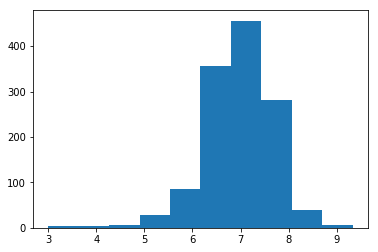

In [7]:
import matplotlib.pyplot as plt
plt.hist(df.mood.values, 10)
plt.show()

In [12]:
print(df.date.min())
print(df.date.max())

2014-02-17
2014-06-09


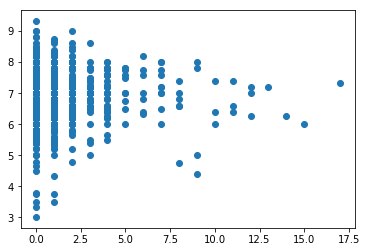

In [30]:
plt.scatter(df.sms.values, df.mood.values)